In [1]:
## Relevant modules.
import pandas as pd
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Reading file.
file = 'data/data_panel.csv'
panel = pd.read_csv(file, header=0)
print(panel.head(), '\n')
print(panel.info())

   doc_code  spec_code                       spec_es  \
0  16449291         22  anestesiologia y reanimacion   
1  31865019         22  anestesiologia y reanimacion   
2   8682278         22  anestesiologia y reanimacion   
3  19188542        120                   cardiologia   
4  70115939        120                   cardiologia   

                            spec_en  year  n_visits  n_surgeries  n_patients  \
0  anesthesiology and resuscitation  2008        59            1          67   
1  anesthesiology and resuscitation  2008        85            2          89   
2  anesthesiology and resuscitation  2008         6            4           6   
3                        cardiology  2008        24            3          24   
4                        cardiology  2008       429          104         430   

   c_visit  c_surgery  dep_code       department  
0    21.69     205.85        76  valle del cauca  
1    21.69     205.85        76  valle del cauca  
2    21.69     205.85        

In [3]:
## Creating subpanel_01 based on specialty
group_01 = panel.groupby(['spec_code','spec_en','year'])[['doc_code']].count()
group_02 = panel.groupby(['spec_code','spec_en','year'])[['n_visits','n_surgeries','n_patients',\
                                                             'c_visit','c_surgery']].mean()

subpanel_01 = pd.merge(group_01, group_02, on=['spec_code','spec_en','year'])
subpanel_01.columns = ['doc_count','mean_n_visits','mean_n_surgeries','mean_n_patients',\
                       'mean_c_visit','mean_c_surgery']
subpanel_01.reset_index(inplace=True)
print(subpanel_01.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
spec_code           297 non-null int64
spec_en             297 non-null object
year                297 non-null int64
doc_count           297 non-null int64
mean_n_visits       297 non-null float64
mean_n_surgeries    297 non-null float64
mean_n_patients     297 non-null float64
mean_c_visit        295 non-null float64
mean_c_surgery      296 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.0+ KB
None


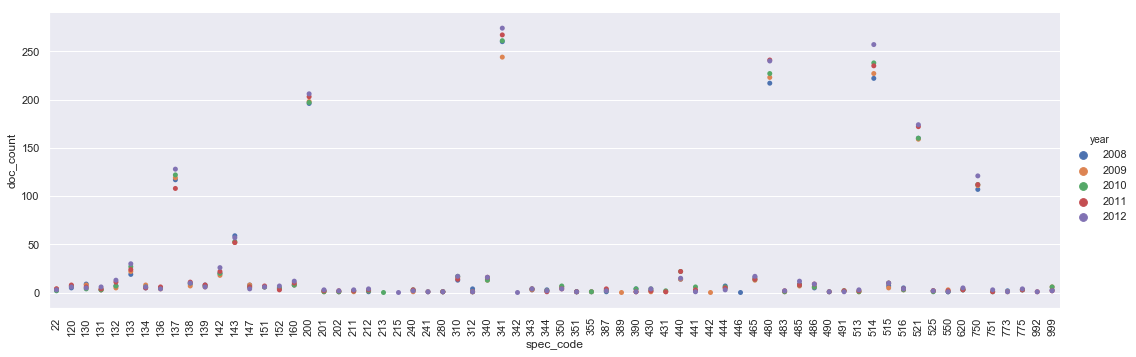

In [4]:
## Illustrating the number of doctors observed for each specialty.
sns.set(style='darkgrid')
fig_01 = sns.catplot(x='spec_code', y='doc_count', data=subpanel_01,\
                     jitter=False, hue='year', height=5, aspect=3)
fig_01.set_xticklabels(rotation=90)
plt.show()

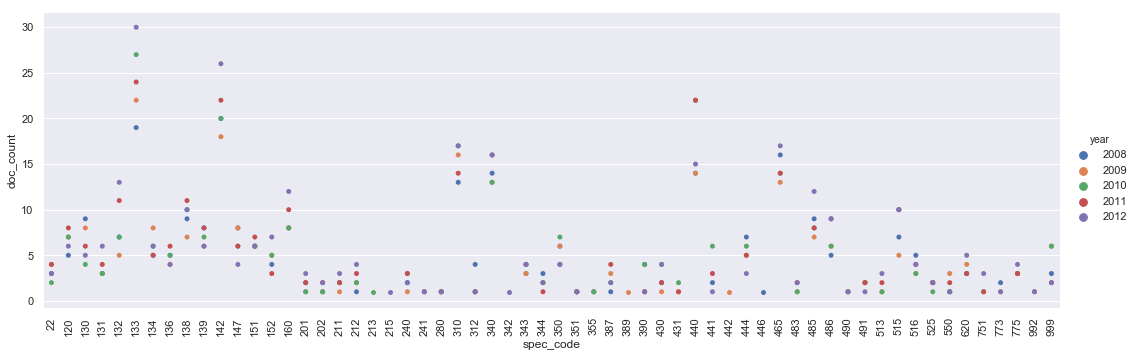

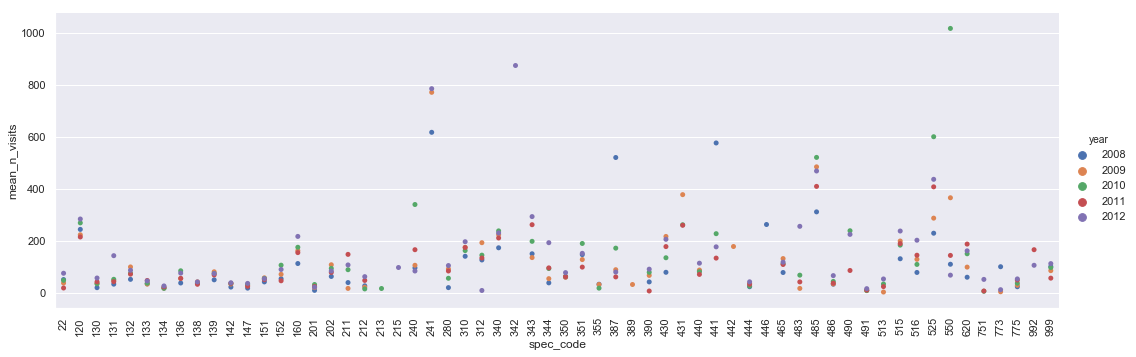

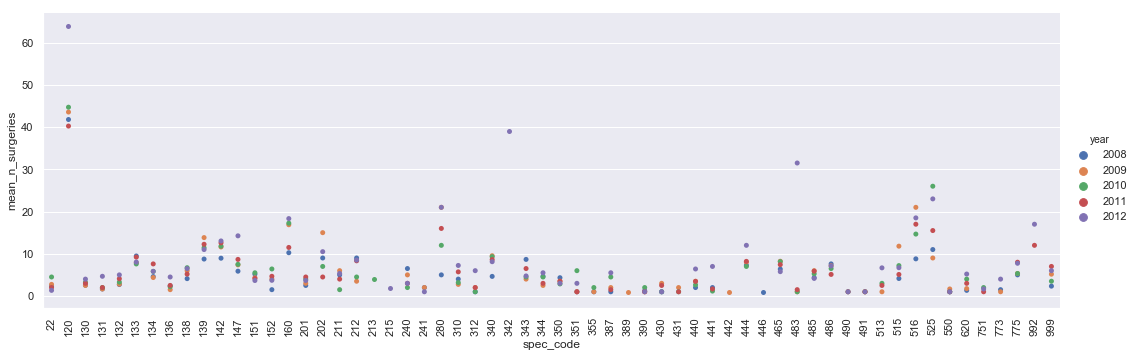

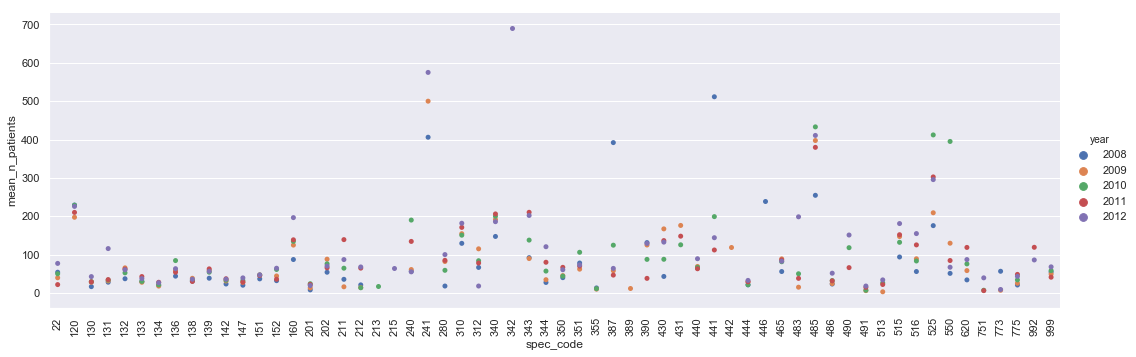

In [5]:
## Only specialties with less than 50 doctors observed per year.
doc_count_less_50 = subpanel_01['doc_count'] < 50

fig_A1 = sns.catplot(x='spec_code', y='doc_count', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_A1.set_xticklabels(rotation=90)

fig_A2 = sns.catplot(x='spec_code', y='mean_n_visits', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_A2.set_xticklabels(rotation=90)

fig_A3 = sns.catplot(x='spec_code', y='mean_n_surgeries', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_A3.set_xticklabels(rotation=90)

fig_A4 = sns.catplot(x='spec_code', y='mean_n_patients', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_A4.set_xticklabels(rotation=90)

plt.show()

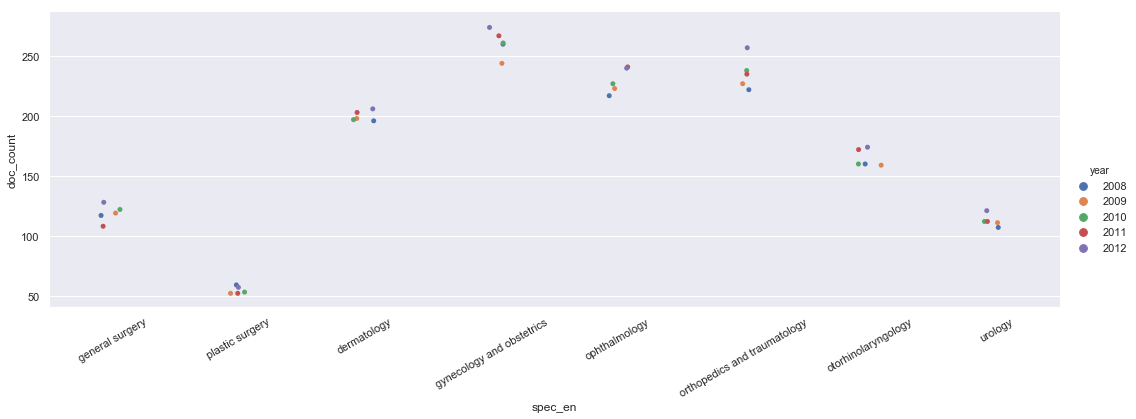

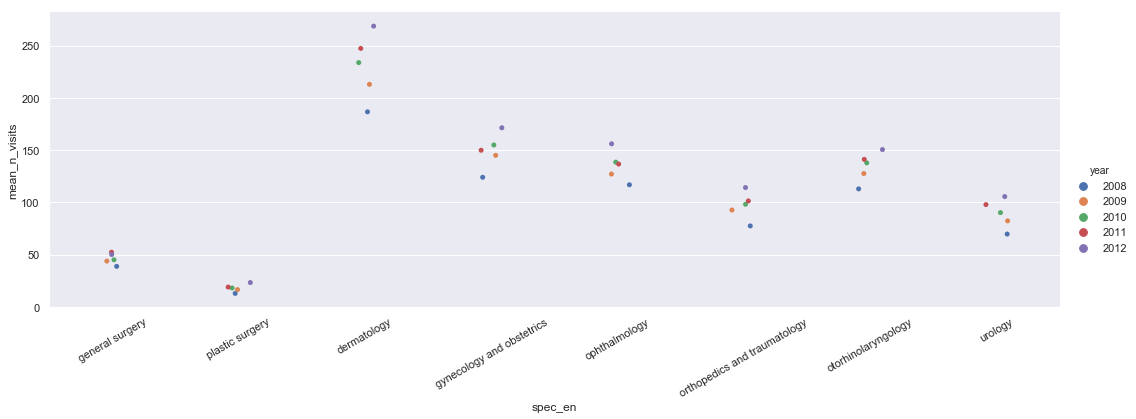

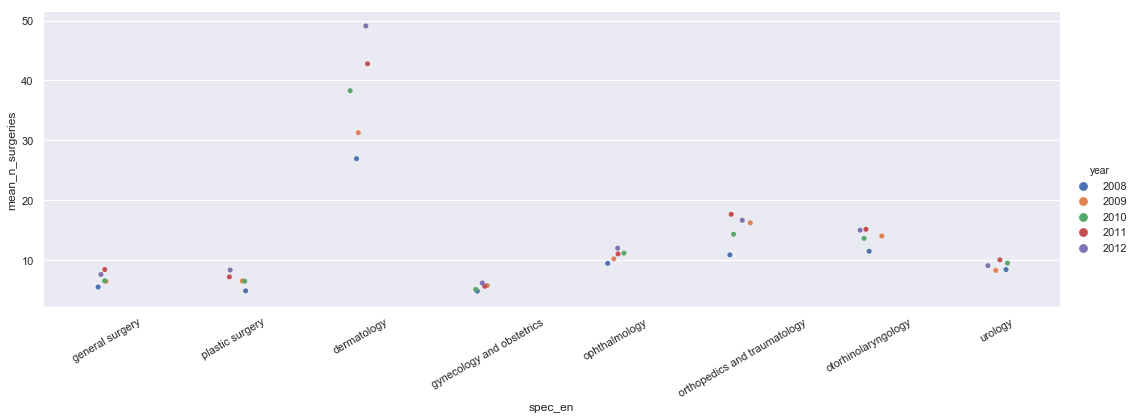

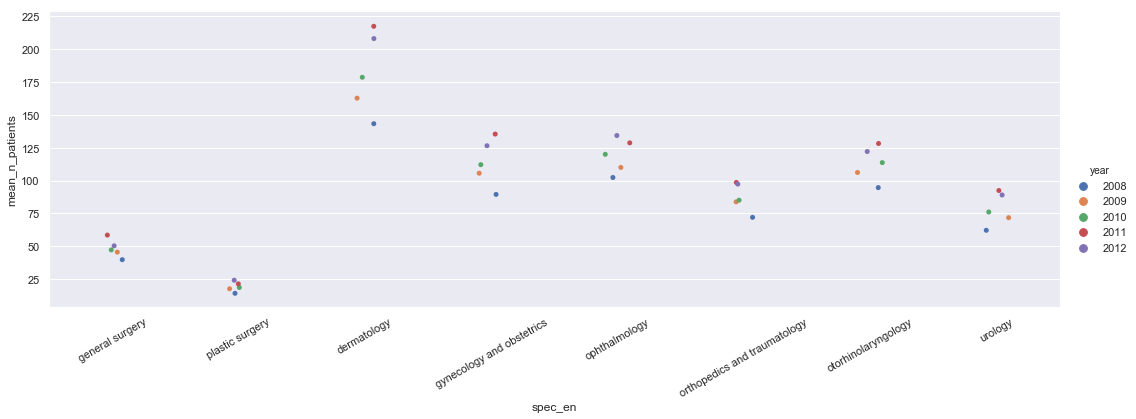

In [6]:
## Only specialties with more than 50 doctors observed per year.
doc_count_more_50 = subpanel_01['doc_count'] > 50

fig_B1 = sns.catplot(x='spec_en', y='doc_count', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_B1.set_xticklabels(rotation=30)

fig_B2 = sns.catplot(x='spec_en', y='mean_n_visits', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_B2.set_xticklabels(rotation=30)

fig_B3 = sns.catplot(x='spec_en', y='mean_n_surgeries', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_B3.set_xticklabels(rotation=30)

fig_B4 = sns.catplot(x='spec_en', y='mean_n_patients', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_B4.set_xticklabels(rotation=30)

plt.show()

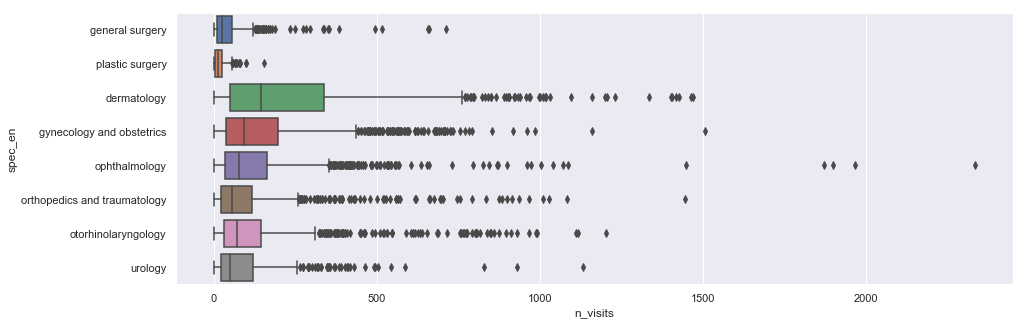

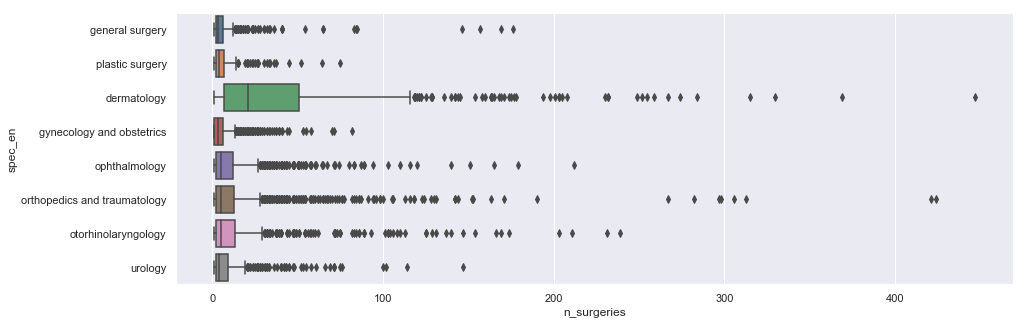

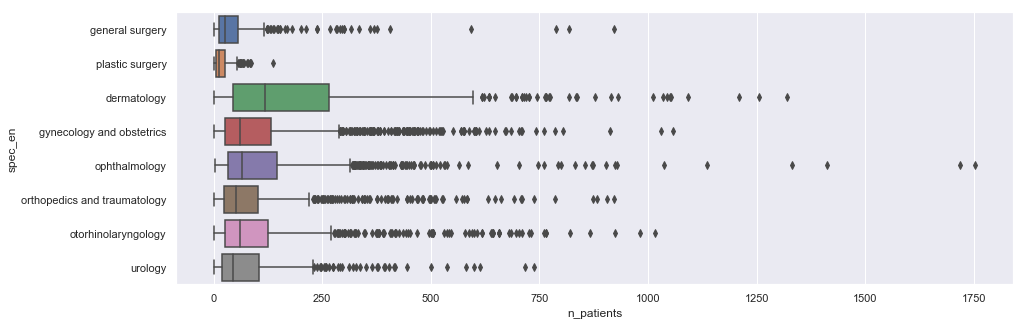

In [7]:
spec_list = []
for i in subpanel_01[doc_count_more_50][['spec_code','spec_en']].values:
    spec_list.append(tuple(i))
spec_code_list = [i[0] for i in pd.Series(spec_list).unique()]
subpanel_02 = panel[panel['spec_code'].isin(spec_code_list)]

fig_C1 = plt.figure(1, figsize=(15,5))
fig_C1 = sns.boxplot(x='n_visits', y='spec_en', data=subpanel_02, orient='h')

fig_C2 = plt.figure(2, figsize=(15,5))
fig_C2 = sns.boxplot(x='n_surgeries', y='spec_en', data=subpanel_02, orient='h')

fig_C3 = plt.figure(3, figsize=(15,5))
fig_C3 = sns.boxplot(x='n_patients', y='spec_en', data=subpanel_02, orient='h')

plt.show()

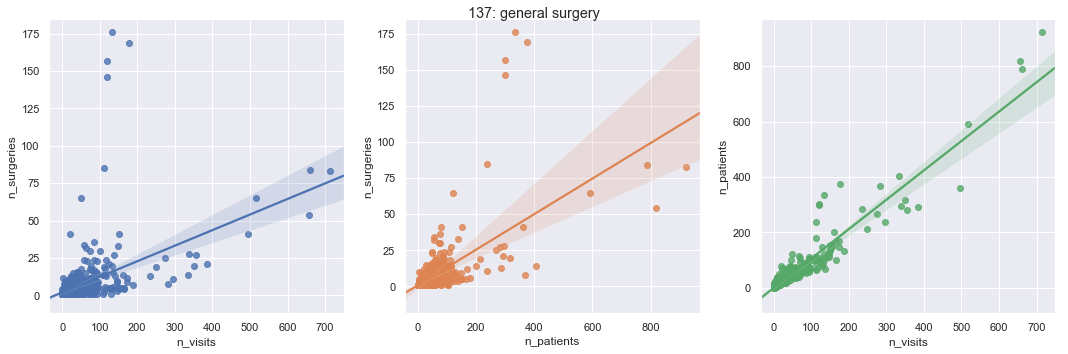

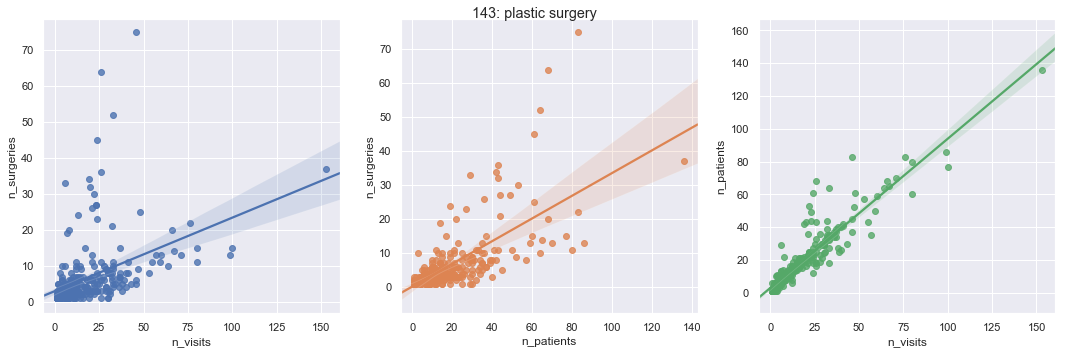

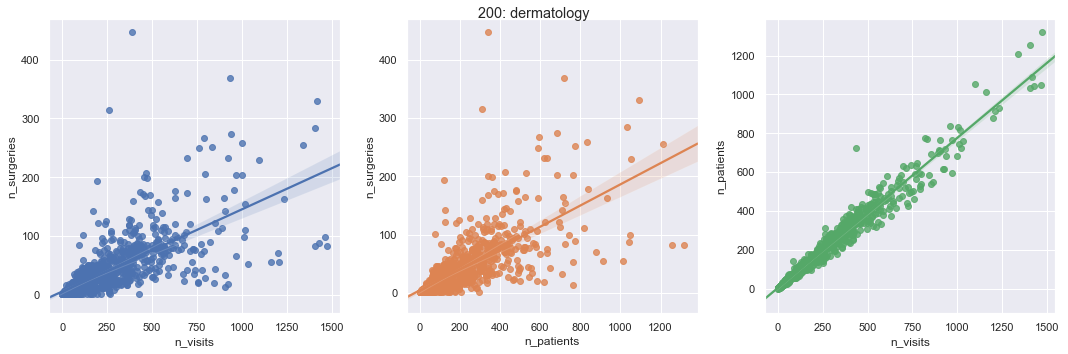

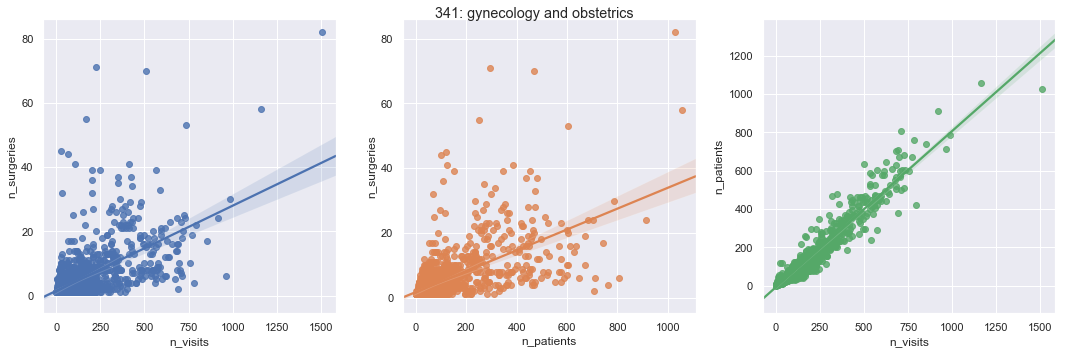

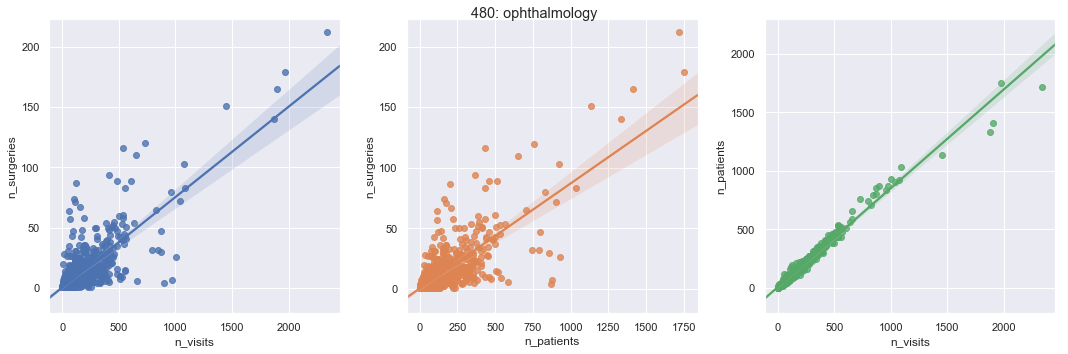

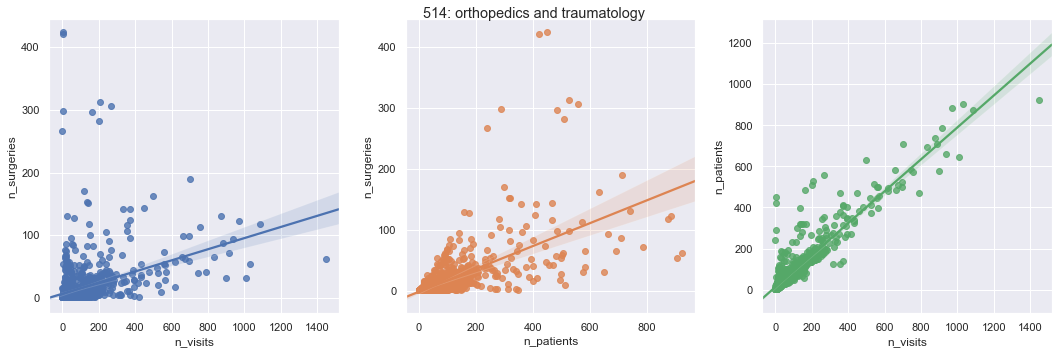

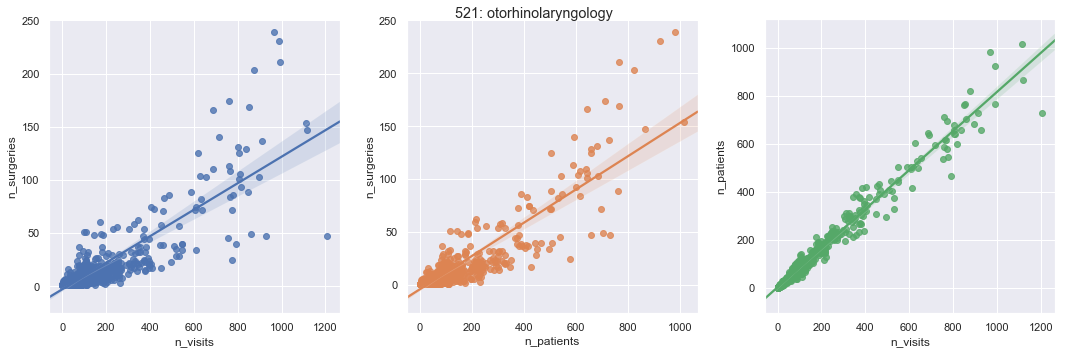

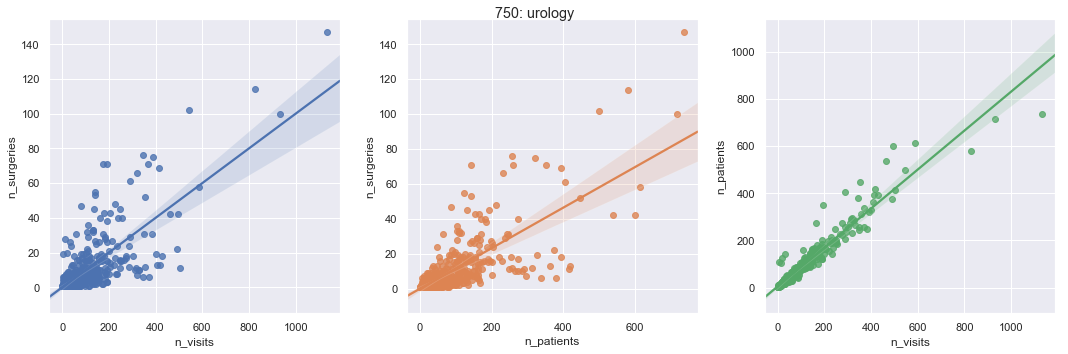

In [8]:
for i in pd.Series(spec_list).unique():
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(str(i[0]) + ': ' + str(i[1]))
    sns.regplot(x='n_visits', y='n_surgeries', data=subpanel_02[subpanel_02['spec_code'] == i[0]], ax=ax[0])
    sns.regplot(x='n_patients', y='n_surgeries', data=subpanel_02[subpanel_02['spec_code'] == i[0]], ax=ax[1])
    sns.regplot(x='n_visits', y='n_patients', data=subpanel_02[subpanel_02['spec_code'] == i[0]], ax=ax[2])
    plt.tight_layout()
plt.show()

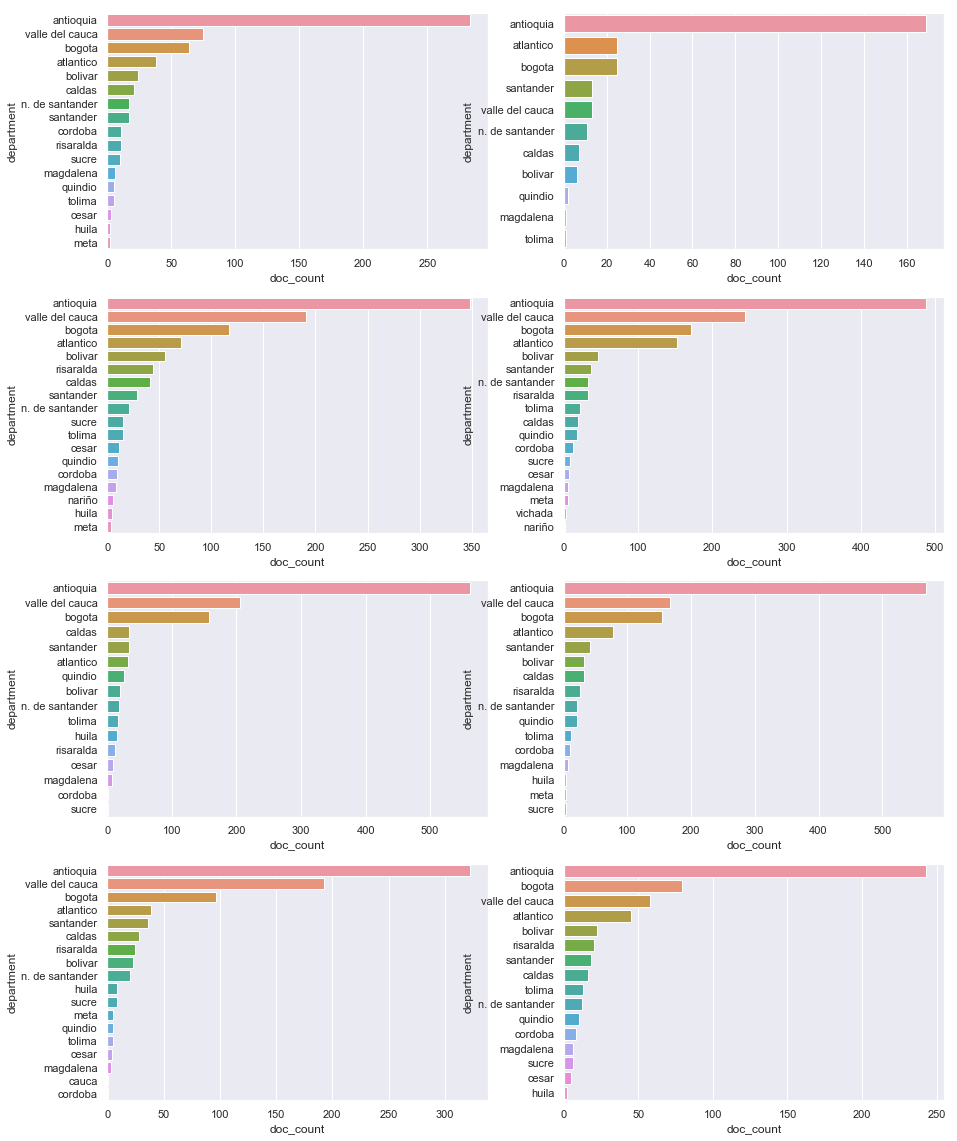

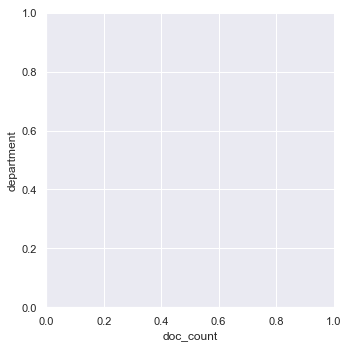

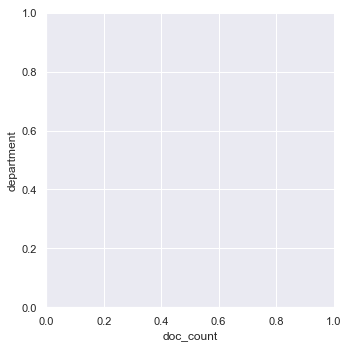

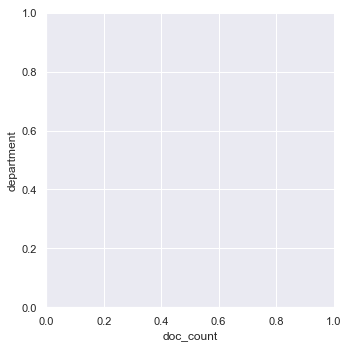

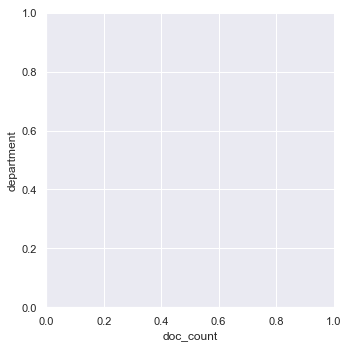

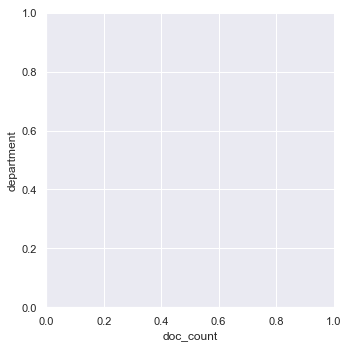

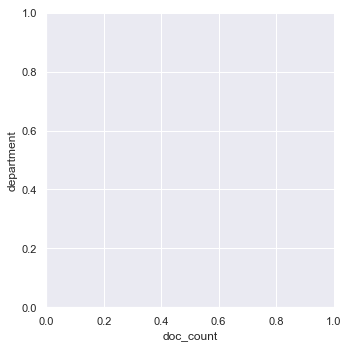

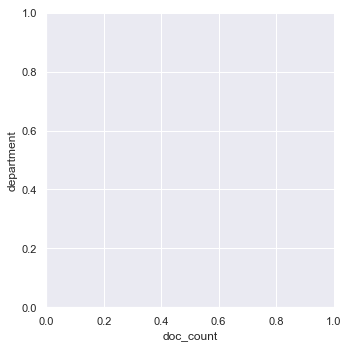

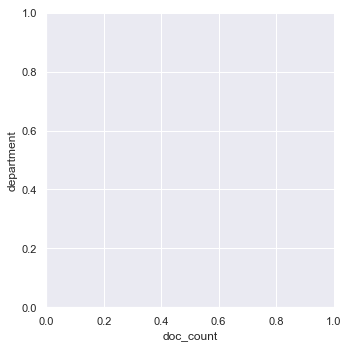

In [9]:
positions = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
tuples = zip(positions, pd.Series(spec_list).unique())

fig, ax = plt.subplots(4, 2, figsize=(15,20))
for i in tuples:
    filter_k = subpanel_02['spec_code'] == i[1][0]
    df_k = subpanel_02[filter_k].groupby(['dep_code','department'])[['doc_code']].count()
    df_k.reset_index(inplace=True)
    df_k.rename(columns={'doc_code': 'doc_count'}, inplace=True)
    df_k.sort_values('doc_count', ascending=False, inplace=True)
    sns.catplot(x='doc_count', y='department', data=df_k, orient='h', kind='bar', ax=ax[i[0][0]][i[0][1]])
plt.tight_layout()    
plt.show()
        
        
  